# Build a Reflective Dynamic Planning Agent for Multi-Step Complex Query Analysis with LangGraph

In this project we will be building a Planning Agent which can generate dynamic plans and iterate and update using reflection to help with multi-step complex query analysis.

![](https://i.imgur.com/odnq3de.png)

### Reflective Dynamic Planning Agent for Multi-Step Complex Query Analysis

This project focuses on building a **Reflective Dynamic Planning Agent for Multi-Step Complex Query Analysis**, designed to break down user queries or tasks into manageable steps, execute them iteratively, and update the plan dynamically through reflection and replanning. The components of the system are as follows:

1. **Plan Creation**:
   - The agent begins by analyzing the user's input (topic or question) to create a **step-by-step plan** of sub-questions or steps needed to solve the overall task.
   - Each step is clearly outlined in the **step-by-step plan** for sequential execution.

2. **Step Execution**:
   - The agent executes one step at a time using **OpenAI GPT-4o**.
   - During execution:
     - External tools, such as the **web search tool**, are used to gather required information or data for the step.
     - The result of the executed step is captured and stored in the agent's state.

3. **Reflection and Replanning**:
   - After each step, the system evaluates the results and sends the **overall plan**, **steps executed**, **results**, and **remaining steps** to the **Replanner**.
   - The **Replanner**:
     - Assesses whether the remaining steps need modification based on the current results and any new insights.
     - Updates the remaining steps if necessary, ensuring alignment with the overall objective.
   - This iterative loop ensures adaptability to errors, incomplete data, or unforeseen circumstances.

4. **Dynamic Feedback Loop**:
   - The system monitors the status of the response:
     - If all steps are executed successfully or an error occurs, the process halts.
     - If there are remaining steps, the agent continues executing them one at a time, integrating results dynamically.

5. **Agent State Maintenance**:
   - Throughout the process, the agent maintains a record of:
     - The **original plan**.
     - **Executed steps and their results**.
     - **Remaining steps** for further execution.
   - This stateful approach ensures traceability and transparency in the agent’s decision-making process.

6. **Final Response Compilation**:
   - Once all steps are executed or the process encounters an error, the agent compiles everything to generate the final reponse.





## Install OpenAI, LangGraph and LangChain dependencies

In [1]:
!pip install langchain==0.3.14
!pip install langchain-openai==0.3.0
!pip install langchain-community==0.3.14
!pip install langgraph==0.2.64
!pip install rich

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.9/326.9 kB 10.4 MB/s eta 0:00:00
  Attempting uninstall: langsmith
    Found existing installation: langsmith 0.3.1
    Uninstalling langsmith-0.3.1:
      Successfully uninstalled langsmith-0.3.1
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.15
    Uninstalling langchain-0.3.15:
      Successfully uninstalled langchain-0.3.15
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.8/50.8 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.6/142.6 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 kB 2.5 MB/s eta 0:00:00


In [2]:
!pip install markitdown

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.9/52.9 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 55.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.8/472.8 kB 33.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.9/32.9 MB 36.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.3/622.3 kB 38.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.1/165.1 kB 13.0 MB/s eta 0:00:00


## Enter Open AI API Key

In [3]:
from getpass import getpass

OPENAI_KEY = getpass('Enter Open AI API Key: ')

Enter Open AI API Key: ··········


## Enter Tavily Search API Key

Get a free API key from [here](https://tavily.com/#api)

In [4]:
TAVILY_API_KEY = getpass('Enter Tavily Search API Key: ')

Enter Tavily Search API Key: ··········


## Setup Environment Variables

In [5]:
import os

os.environ['OPENAI_API_KEY'] = OPENAI_KEY
os.environ['TAVILY_API_KEY'] = TAVILY_API_KEY

## Utility Functions

- __`process_and_truncate_texts(...)`:__ Helps in truncating the content length of content extracted from the web (documents), this is very useful especially to keep documents within the limit of LLM context windows

In [6]:
import tiktoken

def process_and_truncate_texts(text_docs, max_tokens=127000):
    """
    Calculate token counts for a list of text documents and truncate them to fit within max_tokens.

    Args:
        text_docs (list of str): List of text documents to process.
        max_tokens (int): Maximum token limit for truncation.

    Returns:
        list of str: Truncated list of text documents.
    """
    # Load the tokenizer (adjust the encoding name as per your use case, e.g., gpt-3.5-turbo, gpt-4, etc.)
    encoding = tiktoken.encoding_for_model("gpt-4o")

    # Calculate token counts for each document
    tokenized_docs = []
    for text in text_docs:
        tokens = encoding.encode(text)
        tokenized_docs.append(tokens)

    # Flatten all tokens into a single list
    all_tokens = [token for tokens in tokenized_docs for token in tokens]

    # Truncate to the maximum token limit
    truncated_tokens = all_tokens[:max_tokens]

    # Decode the truncated tokens back to text
    truncated_texts = []
    remaining_tokens = truncated_tokens[:]
    for tokens in tokenized_docs:
        if len(remaining_tokens) >= len(tokens):
            # Add the full document if its tokens fit within the remaining budget
            truncated_texts.append(encoding.decode(tokens))
            remaining_tokens = remaining_tokens[len(tokens):]
        else:
            # Partially add tokens of the last fitting document
            truncated_texts.append(encoding.decode(remaining_tokens))
            break

    return truncated_texts

text_docs = [
        "This is the first document. It has some content.",
        "The second document might have more content than the first.",
        "This is the third document. It also has its own content.",
        # Add more documents as needed
    ]

truncated_texts = process_and_truncate_texts(text_docs, max_tokens=20)
truncated_texts

['This is the first document. It has some content.',
 'The second document might have more content than the']

- __`search_web_extract_info(...)`:__ Leverages Tavily to get top search results for a query and then uses Tavily extracted raw content to get the full website data and then calls `process_and_truncate_texts(...)` on the extracted documents to truncate them to a specific token limit

In [104]:
from langchain_core.tools import tool
from langchain_community.utilities.tavily_search import TavilySearchAPIWrapper

tavily_search = TavilySearchAPIWrapper()


def search_web_extract_info(query: str) -> list:
    """Search the web for a query and extracts useful information from the search links."""
    print('Calling web search tool for query:', query)
    results = tavily_search.raw_results(query=query,
                                        max_results=3,
                                        search_depth='advanced',
                                        include_answer=False,
                                        include_raw_content=True)
    docs = [doc['raw_content'] for doc in results['results']]
    docs = process_and_truncate_texts(docs, max_tokens=127000)
    return docs

In [105]:
docs = search_web_extract_info('what is langgraph')

Calling web search tool for query: what is langgraph


In [106]:
len(docs)

3

In [107]:
docs[0]

'Discover content by tools and technology\nDiscover content by data science topics\nLangGraph Tutorial: What Is LangGraph and How to Use It?\nImagine you\'re building a complex, multi-agent large language model (LLM) application. It\'s exciting, but it comes with challenges: managing the state of various agents, coordinating their interactions, and handling errors effectively. This is where LangGraph can help.\nLangGraph is a library within the LangChain ecosystem designed to tackle these challenges head-on. LangGraph provides a framework for defining, coordinating, and executing multiple LLM agents (or chains) in a structured manner.\nIt simplifies the development process by enabling the creation of cyclical graphs, which are essential for developing agent runtimes. With LangGraph, we can easily build robust, scalable, and flexible multi-agent systems.\nIf you want to learn more about the LangChain ecosystem, I recommend this introduction to LangChain.\nWhat Is LangGraph?\nLangGraph e

## Build the Web Research Sub-Agent graph - Tool-Use Agent

This agent or to be more accurate sub-agent will be used in our planner to get information for each query or step in the overall plan

In [108]:
from typing import Annotated

from langchain_openai import ChatOpenAI
from langchain_core.messages import BaseMessage
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode, tools_condition
from langchain_core.messages import HumanMessage, SystemMessage, RemoveMessage
from langchain_core.messages import trim_messages


class State(TypedDict):
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)

tools = [search_web_extract_info]
llm = ChatOpenAI(model="gpt-4o", temperature=0)
llm_with_tools = llm.bind_tools(tools)



SYS_MSG = SystemMessage(content="Act as a helpful assistant and answer user questions")
def chatbot(state: State):
    messages = trim_messages(
            state["messages"],
            max_tokens=127000,
            strategy="last",
            token_counter=ChatOpenAI(model="gpt-4o"),
            allow_partial=True,
    )
    return {"messages": [llm_with_tools.invoke([SYS_MSG] + messages)]}

graph_builder.add_node("chatbot", chatbot)

tool_node = ToolNode(tools=tools)
graph_builder.add_node("tools", tool_node)

graph_builder.add_conditional_edges(
    "chatbot",
    tools_condition,
    ["tools", END]
)
# Any time a tool is called, we return to the chatbot to decide the next step
graph_builder.add_edge("tools", "chatbot")
graph_builder.set_entry_point("chatbot")
react_agent = graph_builder.compile()

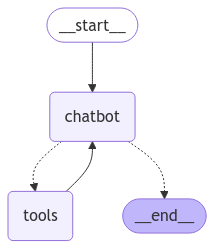

In [109]:
from IPython.display import Image, display

display(Image(react_agent.get_graph().draw_mermaid_png()))

## Test the Web Research Sub-Agent

In [80]:
def call_agent(agent, prompt, user_config={"configurable": {"thread_id": "any"}}):
    events = agent.stream(
        {"messages": [{"role": "user", "content": prompt}]},
        user_config,
        stream_mode="values",
    )

    for event in events:
        event["messages"][-1].pretty_print()

In [81]:
user_prompt = "Can you tell me about langgraph?"

call_agent(agent=react_agent,
           prompt=user_prompt)

================================ Human Message =================================

Can you tell me about langgraph?
================================== Ai Message ==================================
Tool Calls:
  search_web_extract_info (call_qsAzVqP0ozJ9UfqFiFHAvfXz)
 Call ID: call_qsAzVqP0ozJ9UfqFiFHAvfXz
  Args:
    query: langgraph
Calling web search tool for query: langgraph
================================= Tool Message =================================
Name: search_web_extract_info

["🦜🕸️LangGraph¶\n\n\n\n\n⚡ Building language agents as graphs ⚡\nNote\nLooking for the JS version? See the JS repo and the JS docs.\nOverview¶\nLangGraph is a library for building\nstateful, multi-actor applications with LLMs, used to create agent and multi-agent\nworkflows. Check out an introductory tutorial here.\nLangGraph is inspired by Pregel and Apache Beam. The public interface draws inspiration from NetworkX. LangGraph is built by LangChain Inc, the creators of LangChain, but can be used without

In [82]:
user_prompt = "Who are the key founders of Nvidia, what did they previously do and how did nvidia become such a huge company with a huge market cap?"

call_agent(agent=react_agent,
           prompt=user_prompt)

================================ Human Message =================================

Who are the key founders of Nvidia, what did they previously do and how did nvidia become such a huge company with a huge market cap?
================================== Ai Message ==================================
Tool Calls:
  search_web_extract_info (call_jzVfohjo0bKUoJXUcn30EYJe)
 Call ID: call_jzVfohjo0bKUoJXUcn30EYJe
  Args:
    query: Nvidia founders and their previous work
  search_web_extract_info (call_XGVXZ8S4Is3Frqpb3PUUAYBl)
 Call ID: call_XGVXZ8S4Is3Frqpb3PUUAYBl
  Args:
    query: Nvidia company growth and market cap history
Calling web search tool for query: Nvidia founders and their previous work
Calling web search tool for query: Nvidia company growth and market cap history
================================= Tool Message =================================
Name: search_web_extract_info

Error: TypeError('expected string or buffer')
 Please fix your mistakes.
================================

In [83]:
user_prompt = """who is the founder of microsoft, their hometown and history of founder and the company?
               """

call_agent(agent=react_agent,
           prompt=user_prompt)

================================ Human Message =================================

who is the founder of microsoft, their hometown and history of founder and the company?
               
================================== Ai Message ==================================
Tool Calls:
  search_web_extract_info (call_YlZ0iPWDzkphikERCs9JunXf)
 Call ID: call_YlZ0iPWDzkphikERCs9JunXf
  Args:
    query: founder of Microsoft
  search_web_extract_info (call_wekWgOH4qRNVFtOiwYkGKLpu)
 Call ID: call_wekWgOH4qRNVFtOiwYkGKLpu
  Args:
    query: hometown of Bill Gates
  search_web_extract_info (call_yn9XLKcRWRGail2fmJlgfCsK)
 Call ID: call_yn9XLKcRWRGail2fmJlgfCsK
  Args:
    query: history of Bill Gates
  search_web_extract_info (call_sUvDF1xIDxpEqqvDHfW4XVUc)
 Call ID: call_sUvDF1xIDxpEqqvDHfW4XVUc
  Args:
    query: history of Microsoft
Calling web search tool for query: founder of Microsoft
Calling web search tool for query: hometown of Bill GatesCalling web search tool for query: history of Bill Ga

## Create State Schema for our Planning Agent

In [84]:
import operator
from typing import Annotated, List, Tuple
from typing_extensions import TypedDict

# state of the executed plan including overall plan, current status in terms of steps executed and output
# response would either be the final result or errors encountered
class PlanExecute(TypedDict):
    input: str
    plan: List[str]
    past_steps: Annotated[List[Tuple], operator.add]
    response: str

## Create AI Workflow for Plan Generation

In [85]:
from pydantic import BaseModel, Field
from typing import Literal, Union

class Plan(BaseModel):
    """Plan to follow in future to get to a well-researched output for user query"""
    type: Literal["Plan"]
    steps: List[str] = Field(
        description="Different steps to follow in the plan, should be in sorted order"
    )

In [89]:
from langchain_core.prompts import ChatPromptTemplate

planner_prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            """Analyze the given query or task in detail and follow these rules to make a plan:
                - Come up with a simple step by step plan (max 5 steps).
                - This plan should involve individual tasks, that if executed correctly will yield the correct answer.
                - Do not add any extra superfluous steps.
                - The result of the final step should lead to the final answer.
                - Make sure that each step has all the information needed - do not skip steps.
            """,
        ),
        ("placeholder", "{messages}"),
    ]
)

In [90]:
llm_planner = ChatOpenAI(model="gpt-4o-mini", temperature=0)
planner = (
            planner_prompt
                |
            llm_planner.with_structured_output(Plan) #function calling because we are using structured output
)

In [91]:
res = planner.invoke(
    {
        "messages": [
            ("user", "who is the founder of microsoft")
        ]
    }
)

print(res)

type='Plan' steps=['Identify the key figures associated with the founding of Microsoft.', 'Research the history of Microsoft to determine its founding date and the individuals involved.', 'Confirm the roles of Bill Gates and Paul Allen in the establishment of Microsoft.', 'Verify any additional contributions or roles of other individuals at the time of founding.', 'Conclude that Bill Gates and Paul Allen are the co-founders of Microsoft.']


In [92]:
res

Plan(type='Plan', steps=['Identify the key figures associated with the founding of Microsoft.', 'Research the history of Microsoft to determine its founding date and the individuals involved.', 'Confirm the roles of Bill Gates and Paul Allen in the establishment of Microsoft.', 'Verify any additional contributions or roles of other individuals at the time of founding.', 'Conclude that Bill Gates and Paul Allen are the co-founders of Microsoft.'])

## Create AI Workflow for Replanner (with reflection)

In [93]:
from typing import Union

class Response(BaseModel):
    """Response generated for the user."""
    type: Literal["Response"]
    response: str


class Act(BaseModel):
    """Action to perform."""

    action: Union[Response, Plan] = Field(
        description="Action to perform. If you want to respond to user, use Response. "
        "If you need to further use tools to get the answer, use Plan."
    )

In [94]:
replanner_prompt = ChatPromptTemplate.from_template(
    """For the given objective, come up with a simple step by step plan.
       This plan should involve individual tasks, that if executed correctly will yield the correct answer.
       Do not add any extra superfluous steps.
       The result of the final step should be the final answer.
       Make sure that each step has all the information needed - do not skip steps.

       Your main objective was this:
       {input}

       Your original plan was this:
       {plan}

       You have currently done the following steps (with their corresponding results):
       {past_steps}

       Update your plan accordingly as necessary.

       If no more steps are needed then analyze all the information collected so far and generate a detailed formatted answer in Markdown.
       When generating the final response in markdown, if there are special characters in the text, such as the dollar symbol,
       ensure they are escaped properly for correct rendering e.g $25.5 should become \$25.5

       Otherwise, fill out the plan.
       Only add steps to the plan that still NEED to be done.
       Do NOT return previously done steps as part of the plan."""
)

llm_replanner = ChatOpenAI(model="gpt-4o-mini", temperature=0)

replanner = (
                replanner_prompt
                    |
                llm_replanner.with_structured_output(Act)
)

## Create Node Function for Plan Generation

Uses the Planner AI Workflow from above to generate a plan for the given user query

In [95]:
async def plan_step(state: PlanExecute):
    plan = await planner.ainvoke({"messages": [("user", state["input"])]})
    return {"plan": plan.steps}

## Create Node Function for Plan Step Execution

Executes the current step in the plan using the researcher sub-agent

In [96]:
react_agent = graph_builder.compile() # compile and prepare the researcher sub-agent

async def execute_step(state: PlanExecute):
    plan = state["plan"]
    past_steps = state['past_steps']
    if not plan:  # Check if plan is empty
        return {
            "past_steps": [],
            "response": "No steps to execute in the plan."
        }

    plan_str = "\n".join(f"{i+1}. {step}" for i, step in enumerate(plan))
    print('=== plan str ===')
    print(plan_str)
    print('=== end of plan str ===')
    task = plan[0]
    task_formatted = f"""Given the following plan:
                        {plan_str}

                         You are tasked with executing step {1}, {task} only.

                         Here are the past steps already executed, use this information also as needed.
                         {past_steps}

                         Call tools only when you need more information.
                         If doing web search optimize the query for search before tool calling
                         otherwise refer to all the information you have to solve the step.
                         Do NOT call tools for analyzing existing information or compiling reports
                         or formatting documents.
                         """

    agent_response = await react_agent.ainvoke(
        {"messages": [("user", task_formatted)]}
    )
    return {
        "past_steps": [(task, agent_response["messages"][-1].content)],
    }

## Create Node Function for Replanner

Updates the current plan's next steps if needed by reflecting on the past steps executed using the Replanner AI workflow from above

In [97]:
async def replan_step(state: PlanExecute):
    try:
        output = await replanner.ainvoke(state)
        print('=== replanner output ===')
        print(output)
        print('=== end of replanner output ===')

        # Handle dict response
        if isinstance(output, dict) and 'Response' in output:
            return {"response": output['Response']}

        # Handle proper Act instance
        if isinstance(output.action, Response):
            return {"response": output.action.response}
        else:
            return {"plan": output.action.steps}
    except Exception as e:
        print(f"Error in replan_step: {e}")
        return {"response": str(output.get('Response', "An error occurred processing the response."))}

## Create Conditional Edge Function for Stopping the Agent

Stops the agent once all steps have been executed or there is an error

In [98]:
from langgraph.graph import END

def should_end(state: PlanExecute):
    if "response" in state and state["response"]:
        return END
    else:
        return "react_agent"

## Build Planner Agent Graph

In [99]:
from langgraph.graph import StateGraph, START

plan_graph = StateGraph(PlanExecute)

# Add the plan node
plan_graph.add_node("planner", plan_step)
# Add the execution step
plan_graph.add_node("react_agent", execute_step)
# Add a replan node
plan_graph.add_node("replanner", replan_step)

# From plan we go to agent
plan_graph.add_edge("planner", "react_agent")
# From agent, we replanner
plan_graph.add_edge("react_agent", "replanner")
plan_graph.add_conditional_edges(
    "replanner",
    # Next, we pass in the function that will determine which node is called next.
    should_end,
    ["react_agent", END]
)
plan_graph.set_entry_point("planner")
# Finally, we compile it!
# This compiles it into a LangChain Runnable,
# meaning you can use it as you would any other runnable
planner_agent = plan_graph.compile()

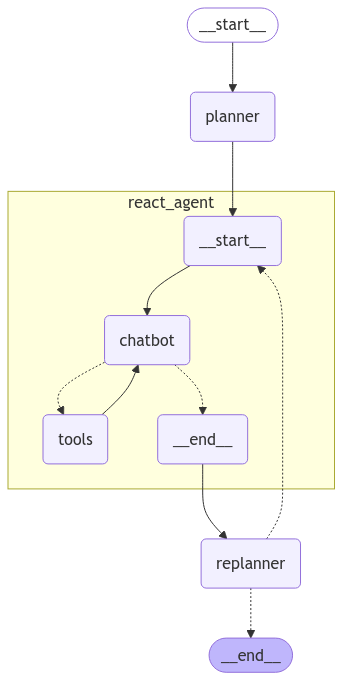

In [100]:
display(Image(planner_agent.get_graph(xray=True).draw_mermaid_png()))

## Run and Test Planner Agent

In [101]:
from IPython.display import display
from rich.markdown import Markdown as RichMarkdown


async def call_planner_agent(agent, prompt, config={"recursion_limit": 50}, verbose=False):
    events = agent.astream(
        prompt,
        config,
        stream_mode="values",
    )

    async for event in events:
        for k, v in event.items():
            if verbose:
                if k != "__end__":
                    display(RichMarkdown(repr(k) + ' -> ' + repr(v)))
            if k == 'response':
                print('='*50)
                print('Response:')
                display(RichMarkdown(v))


In [103]:
prompt = {"input": "who is the founder of microsoft, their hometown and history of founder and the company?"}
await call_planner_agent(agent=planner_agent,
                         prompt=prompt,
                         verbose=True)

'input' -> 'who is the founder of microsoft, their hometown and history of founder and the company?'

'past_steps' -> []

'input' -> 'who is the founder of microsoft, their hometown and history of founder and the company?'

'plan' -> ['Identify the founder of Microsoft, which is Bill Gates.', "Research Bill Gates' hometown, which is     
Seattle, Washington.", "Gather information on Bill Gates' early life, education, and how he became interested in   
computers.", 'Investigate the history of Microsoft, including its founding year (1975) and key milestones in its   
development.', 'Compile the information into a cohesive summary that includes details about Bill Gates and the     
history of Microsoft.']

'past_steps' -> []

=== plan str ===
1. Identify the founder of Microsoft, which is Bill Gates.
2. Research Bill Gates' hometown, which is Seattle, Washington.
3. Gather information on Bill Gates' early life, education, and how he became interested in computers.
4. Investigate the history of Microsoft, including its founding year (1975) and key milestones in its development.
5. Compile the information into a cohesive summary that includes details about Bill Gates and the history of Microsoft.
=== end of plan str ===


'input' -> 'who is the founder of microsoft, their hometown and history of founder and the company?'

'plan' -> ['Identify the founder of Microsoft, which is Bill Gates.', "Research Bill Gates' hometown, which is     
Seattle, Washington.", "Gather information on Bill Gates' early life, education, and how he became interested in   
computers.", 'Investigate the history of Microsoft, including its founding year (1975) and key milestones in its   
development.', 'Compile the information into a cohesive summary that includes details about Bill Gates and the     
history of Microsoft.']

'past_steps' -> [('Identify the founder of Microsoft, which is Bill Gates.', 'The founder of Microsoft is Bill     
Gates.')]

=== replanner output ===
action=Plan(type='Plan', steps=["Research Bill Gates' hometown, which is Seattle, Washington.", "Gather information on Bill Gates' early life, education, and how he became interested in computers.", 'Investigate the history of Microsoft, including its founding year (1975) and key milestones in its development.', 'Compile the information into a cohesive summary that includes details about Bill Gates and the history of Microsoft.'])
=== end of replanner output ===


'input' -> 'who is the founder of microsoft, their hometown and history of founder and the company?'

'plan' -> ["Research Bill Gates' hometown, which is Seattle, Washington.", "Gather information on Bill Gates' early
life, education, and how he became interested in computers.", 'Investigate the history of Microsoft, including its 
founding year (1975) and key milestones in its development.', 'Compile the information into a cohesive summary that
includes details about Bill Gates and the history of Microsoft.']

'past_steps' -> [('Identify the founder of Microsoft, which is Bill Gates.', 'The founder of Microsoft is Bill     
Gates.')]

=== plan str ===
1. Research Bill Gates' hometown, which is Seattle, Washington.
2. Gather information on Bill Gates' early life, education, and how he became interested in computers.
3. Investigate the history of Microsoft, including its founding year (1975) and key milestones in its development.
4. Compile the information into a cohesive summary that includes details about Bill Gates and the history of Microsoft.
=== end of plan str ===
Calling web search tool for query: Seattle Washington history and significance


'input' -> 'who is the founder of microsoft, their hometown and history of founder and the company?'

'plan' -> ["Research Bill Gates' hometown, which is Seattle, Washington.", "Gather information on Bill Gates' early
life, education, and how he became interested in computers.", 'Investigate the history of Microsoft, including its 
founding year (1975) and key milestones in its development.', 'Compile the information into a cohesive summary that
includes details about Bill Gates and the history of Microsoft.']

'past_steps' -> [('Identify the founder of Microsoft, which is Bill Gates.', 'The founder of Microsoft is Bill     
Gates.'), ("Research Bill Gates' hometown, which is Seattle, Washington.", "Seattle, Washington, is a city with a  
rich and dynamic history. It is located in the Pacific Northwest region of the United States and has been a        
significant port city with a history of economic booms and busts. The area has been inhabited for thousands of     
years, originally by the Coast Salish peoples, including the Duwamish and Suquamish tribes.\n\nThe first European  
to visit the Seattle area was George Vancouver in 1792. The city was officially founded in the mid-19th century,   
with the arrival of the Denny Party in 1851. Seattle was named after Chief Si’ahl (Seattle) of the Suquamish and   
Duwamish tribes, who played a crucial role in fostering peaceful relations between the Native Americans and the    
settlers.\n\nSeattle's early economy was driven by the timber industry, and it later became a major hub during the 
Klondike Gold Rush in the late 19th century. The city experienced rapid growth and development, becoming a key     
transportation and trade center.\n\nThroughout its history, Seattle has faced challenges, including the Great      
Seattle Fire of 1889, which destroyed much of the city but led to a rapid rebuilding effort. The city has also been
a center for innovation and culture, hosting the 1962 World's Fair, which left a lasting legacy with landmarks like
the Space Needle.\n\nIn recent decades, Seattle has become a global leader in technology and innovation, home to   
major companies like Microsoft and Amazon. The city's vibrant cultural scene, natural beauty, and diverse          
population continue to make it a dynamic and influential city.")]

=== replanner output ===
action=Plan(type='Plan', steps=["Gather information on Bill Gates' early life, including his birth date (October 28, 1955), family background, and education at Harvard University.", 'Research how Bill Gates became interested in computers, including his early programming experiences and the formation of his first company, Traf-O-Data.', 'Investigate the history of Microsoft, including its founding year (1975), the initial product (Altair BASIC), and key milestones such as the development of Windows and its growth into a tech giant.', "Compile the information into a cohesive summary that includes details about Bill Gates' background and the history of Microsoft."])
=== end of replanner output ===


'input' -> 'who is the founder of microsoft, their hometown and history of founder and the company?'

'plan' -> ["Gather information on Bill Gates' early life, including his birth date (October 28, 1955), family      
background, and education at Harvard University.", 'Research how Bill Gates became interested in computers,        
including his early programming experiences and the formation of his first company, Traf-O-Data.', 'Investigate the
history of Microsoft, including its founding year (1975), the initial product (Altair BASIC), and key milestones   
such as the development of Windows and its growth into a tech giant.', "Compile the information into a cohesive    
summary that includes details about Bill Gates' background and the history of Microsoft."]

'past_steps' -> [('Identify the founder of Microsoft, which is Bill Gates.', 'The founder of Microsoft is Bill     
Gates.'), ("Research Bill Gates' hometown, which is Seattle, Washington.", "Seattle, Washington, is a city with a  
rich and dynamic history. It is located in the Pacific Northwest region of the United States and has been a        
significant port city with a history of economic booms and busts. The area has been inhabited for thousands of     
years, originally by the Coast Salish peoples, including the Duwamish and Suquamish tribes.\n\nThe first European  
to visit the Seattle area was George Vancouver in 1792. The city was officially founded in the mid-19th century,   
with the arrival of the Denny Party in 1851. Seattle was named after Chief Si’ahl (Seattle) of the Suquamish and   
Duwamish tribes, who played a crucial role in fostering peaceful relations between the Native Americans and the    
settlers.\n\nSeattle's early economy was driven by the timber industry, and it later became a major hub during the 
Klondike Gold Rush in the late 19th century. The city experienced rapid growth and development, becoming a key     
transportation and trade center.\n\nThroughout its history, Seattle has faced challenges, including the Great      
Seattle Fire of 1889, which destroyed much of the city but led to a rapid rebuilding effort. The city has also been
a center for innovation and culture, hosting the 1962 World's Fair, which left a lasting legacy with landmarks like
the Space Needle.\n\nIn recent decades, Seattle has become a global leader in technology and innovation, home to   
major companies like Microsoft and Amazon. The city's vibrant cultural scene, natural beauty, and diverse          
population continue to make it a dynamic and influential city.")]

=== plan str ===
1. Gather information on Bill Gates' early life, including his birth date (October 28, 1955), family background, and education at Harvard University.
2. Research how Bill Gates became interested in computers, including his early programming experiences and the formation of his first company, Traf-O-Data.
3. Investigate the history of Microsoft, including its founding year (1975), the initial product (Altair BASIC), and key milestones such as the development of Windows and its growth into a tech giant.
4. Compile the information into a cohesive summary that includes details about Bill Gates' background and the history of Microsoft.
=== end of plan str ===
Calling web search tool for query: Bill Gates early life family background education Harvard University
Calling web search tool for query: Bill Gates early life family background education Harvard University
Calling web search tool for query: Bill Gates early life family background education Harvard University


'input' -> 'who is the founder of microsoft, their hometown and history of founder and the company?'

'plan' -> ["Gather information on Bill Gates' early life, including his birth date (October 28, 1955), family      
background, and education at Harvard University.", 'Research how Bill Gates became interested in computers,        
including his early programming experiences and the formation of his first company, Traf-O-Data.', 'Investigate the
history of Microsoft, including its founding year (1975), the initial product (Altair BASIC), and key milestones   
such as the development of Windows and its growth into a tech giant.', "Compile the information into a cohesive    
summary that includes details about Bill Gates' background and the history of Microsoft."]

'past_steps' -> [('Identify the founder of Microsoft, which is Bill Gates.', 'The founder of Microsoft is Bill     
Gates.'), ("Research Bill Gates' hometown, which is Seattle, Washington.", "Seattle, Washington, is a city with a  
rich and dynamic history. It is located in the Pacific Northwest region of the United States and has been a        
significant port city with a history of economic booms and busts. The area has been inhabited for thousands of     
years, originally by the Coast Salish peoples, including the Duwamish and Suquamish tribes.\n\nThe first European  
to visit the Seattle area was George Vancouver in 1792. The city was officially founded in the mid-19th century,   
with the arrival of the Denny Party in 1851. Seattle was named after Chief Si’ahl (Seattle) of the Suquamish and   
Duwamish tribes, who played a crucial role in fostering peaceful relations between the Native Americans and the    
settlers.\n\nSeattle's early economy was driven by the timber industry, and it later became a major hub during the 
Klondike Gold Rush in the late 19th century. The city experienced rapid growth and development, becoming a key     
transportation and trade center.\n\nThroughout its history, Seattle has faced challenges, including the Great      
Seattle Fire of 1889, which destroyed much of the city but led to a rapid rebuilding effort. The city has also been
a center for innovation and culture, hosting the 1962 World's Fair, which left a lasting legacy with landmarks like
the Space Needle.\n\nIn recent decades, Seattle has become a global leader in technology and innovation, home to   
major companies like Microsoft and Amazon. The city's vibrant cultural scene, natural beauty, and diverse          
population continue to make it a dynamic and influential city."), ("Gather information on Bill Gates' early life,  
including his birth date (October 28, 1955), family background, and education at Harvard University.", 'It seems   
there is an issue with the tool I attempted to use for gathering information. However, I can provide some          
information based on what I know:\n\n1. Birth Date: Bill Gates was born on October 28, 1955.\n\n2. Family          
Background: Bill Gates was born in Seattle, Washington, to a prominent family. His father, William H. Gates Sr.,   
was a successful attorney, and his mother, Mary Maxwell Gates, was a schoolteacher and later served on the board of
directors for First Interstate BancSystem and the United Way. Gates has two sisters, Kristi and Libby.\n\n3.       
Education at Harvard University: Bill Gates attended Harvard University starting in 1973. During his time at       
Harvard, he developed a version of the programming language BASIC for the first microcomputer, the MITS Altair.    
Gates did not complete his studies at Harvard, as he left in 1975 to pursue his business ventures with             
Microsoft.\n\nIf you need more detailed information or specific aspects of his early life, please let me know!')]

=== replanner output ===
action=Plan(type='Plan', steps=['Investigate how Bill Gates became interested in computers, including his early programming experiences and the formation of his first company, Traf-O-Data.', 'Research the history of Microsoft, including its founding year (1975), the initial product (Altair BASIC), and key milestones such as the development of Windows and its growth into a tech giant.', "Compile the information into a cohesive summary that includes details about Bill Gates' background and the history of Microsoft."])
=== end of replanner output ===


'input' -> 'who is the founder of microsoft, their hometown and history of founder and the company?'

'plan' -> ['Investigate how Bill Gates became interested in computers, including his early programming experiences 
and the formation of his first company, Traf-O-Data.', 'Research the history of Microsoft, including its founding  
year (1975), the initial product (Altair BASIC), and key milestones such as the development of Windows and its     
growth into a tech giant.', "Compile the information into a cohesive summary that includes details about Bill      
Gates' background and the history of Microsoft."]

'past_steps' -> [('Identify the founder of Microsoft, which is Bill Gates.', 'The founder of Microsoft is Bill     
Gates.'), ("Research Bill Gates' hometown, which is Seattle, Washington.", "Seattle, Washington, is a city with a  
rich and dynamic history. It is located in the Pacific Northwest region of the United States and has been a        
significant port city with a history of economic booms and busts. The area has been inhabited for thousands of     
years, originally by the Coast Salish peoples, including the Duwamish and Suquamish tribes.\n\nThe first European  
to visit the Seattle area was George Vancouver in 1792. The city was officially founded in the mid-19th century,   
with the arrival of the Denny Party in 1851. Seattle was named after Chief Si’ahl (Seattle) of the Suquamish and   
Duwamish tribes, who played a crucial role in fostering peaceful relations between the Native Americans and the    
settlers.\n\nSeattle's early economy was driven by the timber industry, and it later became a major hub during the 
Klondike Gold Rush in the late 19th century. The city experienced rapid growth and development, becoming a key     
transportation and trade center.\n\nThroughout its history, Seattle has faced challenges, including the Great      
Seattle Fire of 1889, which destroyed much of the city but led to a rapid rebuilding effort. The city has also been
a center for innovation and culture, hosting the 1962 World's Fair, which left a lasting legacy with landmarks like
the Space Needle.\n\nIn recent decades, Seattle has become a global leader in technology and innovation, home to   
major companies like Microsoft and Amazon. The city's vibrant cultural scene, natural beauty, and diverse          
population continue to make it a dynamic and influential city."), ("Gather information on Bill Gates' early life,  
including his birth date (October 28, 1955), family background, and education at Harvard University.", 'It seems   
there is an issue with the tool I attempted to use for gathering information. However, I can provide some          
information based on what I know:\n\n1. Birth Date: Bill Gates was born on October 28, 1955.\n\n2. Family          
Background: Bill Gates was born in Seattle, Washington, to a prominent family. His father, William H. Gates Sr.,   
was a successful attorney, and his mother, Mary Maxwell Gates, was a schoolteacher and later served on the board of
directors for First Interstate BancSystem and the United Way. Gates has two sisters, Kristi and Libby.\n\n3.       
Education at Harvard University: Bill Gates attended Harvard University starting in 1973. During his time at       
Harvard, he developed a version of the programming language BASIC for the first microcomputer, the MITS Altair.    
Gates did not complete his studies at Harvard, as he left in 1975 to pursue his business ventures with             
Microsoft.\n\nIf you need more detailed information or specific aspects of his early life, please let me know!')]

=== plan str ===
1. Investigate how Bill Gates became interested in computers, including his early programming experiences and the formation of his first company, Traf-O-Data.
2. Research the history of Microsoft, including its founding year (1975), the initial product (Altair BASIC), and key milestones such as the development of Windows and its growth into a tech giant.
3. Compile the information into a cohesive summary that includes details about Bill Gates' background and the history of Microsoft.
=== end of plan str ===
Calling web search tool for query: Bill Gates early interest in computers and Traf-O-Data
Calling web search tool for query: Bill Gates early interest in computers Traf-O-Data


'input' -> 'who is the founder of microsoft, their hometown and history of founder and the company?'

'plan' -> ['Investigate how Bill Gates became interested in computers, including his early programming experiences 
and the formation of his first company, Traf-O-Data.', 'Research the history of Microsoft, including its founding  
year (1975), the initial product (Altair BASIC), and key milestones such as the development of Windows and its     
growth into a tech giant.', "Compile the information into a cohesive summary that includes details about Bill      
Gates' background and the history of Microsoft."]

'past_steps' -> [('Identify the founder of Microsoft, which is Bill Gates.', 'The founder of Microsoft is Bill     
Gates.'), ("Research Bill Gates' hometown, which is Seattle, Washington.", "Seattle, Washington, is a city with a  
rich and dynamic history. It is located in the Pacific Northwest region of the United States and has been a        
significant port city with a history of economic booms and busts. The area has been inhabited for thousands of     
years, originally by the Coast Salish peoples, including the Duwamish and Suquamish tribes.\n\nThe first European  
to visit the Seattle area was George Vancouver in 1792. The city was officially founded in the mid-19th century,   
with the arrival of the Denny Party in 1851. Seattle was named after Chief Si’ahl (Seattle) of the Suquamish and   
Duwamish tribes, who played a crucial role in fostering peaceful relations between the Native Americans and the    
settlers.\n\nSeattle's early economy was driven by the timber industry, and it later became a major hub during the 
Klondike Gold Rush in the late 19th century. The city experienced rapid growth and development, becoming a key     
transportation and trade center.\n\nThroughout its history, Seattle has faced challenges, including the Great      
Seattle Fire of 1889, which destroyed much of the city but led to a rapid rebuilding effort. The city has also been
a center for innovation and culture, hosting the 1962 World's Fair, which left a lasting legacy with landmarks like
the Space Needle.\n\nIn recent decades, Seattle has become a global leader in technology and innovation, home to   
major companies like Microsoft and Amazon. The city's vibrant cultural scene, natural beauty, and diverse          
population continue to make it a dynamic and influential city."), ("Gather information on Bill Gates' early life,  
including his birth date (October 28, 1955), family background, and education at Harvard University.", 'It seems   
there is an issue with the tool I attempted to use for gathering information. However, I can provide some          
information based on what I know:\n\n1. Birth Date: Bill Gates was born on October 28, 1955.\n\n2. Family          
Background: Bill Gates was born in Seattle, Washington, to a prominent family. His father, William H. Gates Sr.,   
was a successful attorney, and his mother, Mary Maxwell Gates, was a schoolteacher and later served on the board of
directors for First Interstate BancSystem and the United Way. Gates has two sisters, Kristi and Libby.\n\n3.       
Education at Harvard University: Bill Gates attended Harvard University starting in 1973. During his time at       
Harvard, he developed a version of the programming language BASIC for the first microcomputer, the MITS Altair.    
Gates did not complete his studies at Harvard, as he left in 1975 to pursue his business ventures with             
Microsoft.\n\nIf you need more detailed information or specific aspects of his early life, please let me know!'),  
('Investigate how Bill Gates became interested in computers, including his early programming experiences and the   
formation of his first company, Traf-O-Data.', "Bill Gates' interest in computers began at a young age during his  
time at Lakeside School, a private preparatory school in Seattle, Washington. It was here that Gates first         
encountered a computer, a teletype terminal connected to a General Electric (GE) computer. This experience sparked 
his fascination with computing, and he, along with his friends, spent countless hours exploring programming        
possibilities.\n\nGates' early programming experiences were further developed through the Lakeside Programmers     
Club, which he and his friends formed in 1968. They worked on various projects, including exploiting bugs in the   
operating system to gain free computer time. This early exposure to computing and programming laid the foundation  
for Gates' future endeavors.\n\nOne of Gates' first busi

=== replanner output ===
action=Plan(type='Plan', steps=['Research the founding year of Microsoft and its initial product, Altair BASIC.', "Investigate key milestones in Microsoft's history, including the development of Windows and its growth into a tech giant.", "Compile the information into a cohesive summary that includes details about Bill Gates' background, his role in founding Microsoft, and the history of the company."])
=== end of replanner output ===


'input' -> 'who is the founder of microsoft, their hometown and history of founder and the company?'

'plan' -> ['Research the founding year of Microsoft and its initial product, Altair BASIC.', "Investigate key      
milestones in Microsoft's history, including the development of Windows and its growth into a tech giant.",        
"Compile the information into a cohesive summary that includes details about Bill Gates' background, his role in   
founding Microsoft, and the history of the company."]

'past_steps' -> [('Identify the founder of Microsoft, which is Bill Gates.', 'The founder of Microsoft is Bill     
Gates.'), ("Research Bill Gates' hometown, which is Seattle, Washington.", "Seattle, Washington, is a city with a  
rich and dynamic history. It is located in the Pacific Northwest region of the United States and has been a        
significant port city with a history of economic booms and busts. The area has been inhabited for thousands of     
years, originally by the Coast Salish peoples, including the Duwamish and Suquamish tribes.\n\nThe first European  
to visit the Seattle area was George Vancouver in 1792. The city was officially founded in the mid-19th century,   
with the arrival of the Denny Party in 1851. Seattle was named after Chief Si’ahl (Seattle) of the Suquamish and   
Duwamish tribes, who played a crucial role in fostering peaceful relations between the Native Americans and the    
settlers.\n\nSeattle's early economy was driven by the timber industry, and it later became a major hub during the 
Klondike Gold Rush in the late 19th century. The city experienced rapid growth and development, becoming a key     
transportation and trade center.\n\nThroughout its history, Seattle has faced challenges, including the Great      
Seattle Fire of 1889, which destroyed much of the city but led to a rapid rebuilding effort. The city has also been
a center for innovation and culture, hosting the 1962 World's Fair, which left a lasting legacy with landmarks like
the Space Needle.\n\nIn recent decades, Seattle has become a global leader in technology and innovation, home to   
major companies like Microsoft and Amazon. The city's vibrant cultural scene, natural beauty, and diverse          
population continue to make it a dynamic and influential city."), ("Gather information on Bill Gates' early life,  
including his birth date (October 28, 1955), family background, and education at Harvard University.", 'It seems   
there is an issue with the tool I attempted to use for gathering information. However, I can provide some          
information based on what I know:\n\n1. Birth Date: Bill Gates was born on October 28, 1955.\n\n2. Family          
Background: Bill Gates was born in Seattle, Washington, to a prominent family. His father, William H. Gates Sr.,   
was a successful attorney, and his mother, Mary Maxwell Gates, was a schoolteacher and later served on the board of
directors for First Interstate BancSystem and the United Way. Gates has two sisters, Kristi and Libby.\n\n3.       
Education at Harvard University: Bill Gates attended Harvard University starting in 1973. During his time at       
Harvard, he developed a version of the programming language BASIC for the first microcomputer, the MITS Altair.    
Gates did not complete his studies at Harvard, as he left in 1975 to pursue his business ventures with             
Microsoft.\n\nIf you need more detailed information or specific aspects of his early life, please let me know!'),  
('Investigate how Bill Gates became interested in computers, including his early programming experiences and the   
formation of his first company, Traf-O-Data.', "Bill Gates' interest in computers began at a young age during his  
time at Lakeside School, a private preparatory school in Seattle, Washington. It was here that Gates first         
encountered a computer, a teletype terminal connected to a General Electric (GE) computer. This experience sparked 
his fascination with computing, and he, along with his friends, spent countless hours exploring programming        
possibilities.\n\nGates' early programming experiences were further developed through the Lakeside Programmers     
Club, which he and his friends formed in 1968. They worked on various projects, including exploiting bugs in the   
operating system to gain free computer time. This early exposure to computing and programming laid the foundation  
for Gates' future endeavors.\n\nOne of Gates' first busi

=== plan str ===
1. Research the founding year of Microsoft and its initial product, Altair BASIC.
2. Investigate key milestones in Microsoft's history, including the development of Windows and its growth into a tech giant.
3. Compile the information into a cohesive summary that includes details about Bill Gates' background, his role in founding Microsoft, and the history of the company.
=== end of plan str ===
Calling web search tool for query: Microsoft founding year
Calling web search tool for query: Altair BASIC initial product Microsoft
Calling web search tool for query: Calling web search tool for query: Altair BASIC initial product Microsoft 1975
Microsoft founding year 1975


'input' -> 'who is the founder of microsoft, their hometown and history of founder and the company?'

'plan' -> ['Research the founding year of Microsoft and its initial product, Altair BASIC.', "Investigate key      
milestones in Microsoft's history, including the development of Windows and its growth into a tech giant.",        
"Compile the information into a cohesive summary that includes details about Bill Gates' background, his role in   
founding Microsoft, and the history of the company."]

'past_steps' -> [('Identify the founder of Microsoft, which is Bill Gates.', 'The founder of Microsoft is Bill     
Gates.'), ("Research Bill Gates' hometown, which is Seattle, Washington.", "Seattle, Washington, is a city with a  
rich and dynamic history. It is located in the Pacific Northwest region of the United States and has been a        
significant port city with a history of economic booms and busts. The area has been inhabited for thousands of     
years, originally by the Coast Salish peoples, including the Duwamish and Suquamish tribes.\n\nThe first European  
to visit the Seattle area was George Vancouver in 1792. The city was officially founded in the mid-19th century,   
with the arrival of the Denny Party in 1851. Seattle was named after Chief Si’ahl (Seattle) of the Suquamish and   
Duwamish tribes, who played a crucial role in fostering peaceful relations between the Native Americans and the    
settlers.\n\nSeattle's early economy was driven by the timber industry, and it later became a major hub during the 
Klondike Gold Rush in the late 19th century. The city experienced rapid growth and development, becoming a key     
transportation and trade center.\n\nThroughout its history, Seattle has faced challenges, including the Great      
Seattle Fire of 1889, which destroyed much of the city but led to a rapid rebuilding effort. The city has also been
a center for innovation and culture, hosting the 1962 World's Fair, which left a lasting legacy with landmarks like
the Space Needle.\n\nIn recent decades, Seattle has become a global leader in technology and innovation, home to   
major companies like Microsoft and Amazon. The city's vibrant cultural scene, natural beauty, and diverse          
population continue to make it a dynamic and influential city."), ("Gather information on Bill Gates' early life,  
including his birth date (October 28, 1955), family background, and education at Harvard University.", 'It seems   
there is an issue with the tool I attempted to use for gathering information. However, I can provide some          
information based on what I know:\n\n1. Birth Date: Bill Gates was born on October 28, 1955.\n\n2. Family          
Background: Bill Gates was born in Seattle, Washington, to a prominent family. His father, William H. Gates Sr.,   
was a successful attorney, and his mother, Mary Maxwell Gates, was a schoolteacher and later served on the board of
directors for First Interstate BancSystem and the United Way. Gates has two sisters, Kristi and Libby.\n\n3.       
Education at Harvard University: Bill Gates attended Harvard University starting in 1973. During his time at       
Harvard, he developed a version of the programming language BASIC for the first microcomputer, the MITS Altair.    
Gates did not complete his studies at Harvard, as he left in 1975 to pursue his business ventures with             
Microsoft.\n\nIf you need more detailed information or specific aspects of his early life, please let me know!'),  
('Investigate how Bill Gates became interested in computers, including his early programming experiences and the   
formation of his first company, Traf-O-Data.', "Bill Gates' interest in computers began at a young age during his  
time at Lakeside School, a private preparatory school in Seattle, Washington. It was here that Gates first         
encountered a computer, a teletype terminal connected to a General Electric (GE) computer. This experience sparked 
his fascination with computing, and he, along with his friends, spent countless hours exploring programming        
possibilities.\n\nGates' early programming experiences were further developed through the Lakeside Programmers     
Club, which he and his friends formed in 1968. They worked on various projects, including exploiting bugs in the   
operating system to gain free computer time. This early exposure to computing and programming laid the foundation  
for Gates' future endeavors.\n\nOne of Gates' first busi

=== replanner output ===
action=Plan(type='Plan', steps=["Compile the information gathered about Bill Gates' background, including his birth date, family background, and education.", 'Summarize the history of Microsoft, including its founding year, initial product, and key milestones in its development.'])
=== end of replanner output ===


'input' -> 'who is the founder of microsoft, their hometown and history of founder and the company?'

'plan' -> ["Compile the information gathered about Bill Gates' background, including his birth date, family        
background, and education.", 'Summarize the history of Microsoft, including its founding year, initial product, and
key milestones in its development.']

'past_steps' -> [('Identify the founder of Microsoft, which is Bill Gates.', 'The founder of Microsoft is Bill     
Gates.'), ("Research Bill Gates' hometown, which is Seattle, Washington.", "Seattle, Washington, is a city with a  
rich and dynamic history. It is located in the Pacific Northwest region of the United States and has been a        
significant port city with a history of economic booms and busts. The area has been inhabited for thousands of     
years, originally by the Coast Salish peoples, including the Duwamish and Suquamish tribes.\n\nThe first European  
to visit the Seattle area was George Vancouver in 1792. The city was officially founded in the mid-19th century,   
with the arrival of the Denny Party in 1851. Seattle was named after Chief Si’ahl (Seattle) of the Suquamish and   
Duwamish tribes, who played a crucial role in fostering peaceful relations between the Native Americans and the    
settlers.\n\nSeattle's early economy was driven by the timber industry, and it later became a major hub during the 
Klondike Gold Rush in the late 19th century. The city experienced rapid growth and development, becoming a key     
transportation and trade center.\n\nThroughout its history, Seattle has faced challenges, including the Great      
Seattle Fire of 1889, which destroyed much of the city but led to a rapid rebuilding effort. The city has also been
a center for innovation and culture, hosting the 1962 World's Fair, which left a lasting legacy with landmarks like
the Space Needle.\n\nIn recent decades, Seattle has become a global leader in technology and innovation, home to   
major companies like Microsoft and Amazon. The city's vibrant cultural scene, natural beauty, and diverse          
population continue to make it a dynamic and influential city."), ("Gather information on Bill Gates' early life,  
including his birth date (October 28, 1955), family background, and education at Harvard University.", 'It seems   
there is an issue with the tool I attempted to use for gathering information. However, I can provide some          
information based on what I know:\n\n1. Birth Date: Bill Gates was born on October 28, 1955.\n\n2. Family          
Background: Bill Gates was born in Seattle, Washington, to a prominent family. His father, William H. Gates Sr.,   
was a successful attorney, and his mother, Mary Maxwell Gates, was a schoolteacher and later served on the board of
directors for First Interstate BancSystem and the United Way. Gates has two sisters, Kristi and Libby.\n\n3.       
Education at Harvard University: Bill Gates attended Harvard University starting in 1973. During his time at       
Harvard, he developed a version of the programming language BASIC for the first microcomputer, the MITS Altair.    
Gates did not complete his studies at Harvard, as he left in 1975 to pursue his business ventures with             
Microsoft.\n\nIf you need more detailed information or specific aspects of his early life, please let me know!'),  
('Investigate how Bill Gates became interested in computers, including his early programming experiences and the   
formation of his first company, Traf-O-Data.', "Bill Gates' interest in computers began at a young age during his  
time at Lakeside School, a private preparatory school in Seattle, Washington. It was here that Gates first         
encountered a computer, a teletype terminal connected to a General Electric (GE) computer. This experience sparked 
his fascination with computing, and he, along with his friends, spent countless hours exploring programming        
possibilities.\n\nGates' early programming experiences were further developed through the Lakeside Programmers     
Club, which he and his friends formed in 1968. They worked on various projects, including exploiting bugs in the   
operating system to gain free computer time. This early exposure to computing and programming laid the foundation  
for Gates' future endeavors.\n\nOne of Gates' first busi

=== plan str ===
1. Compile the information gathered about Bill Gates' background, including his birth date, family background, and education.
2. Summarize the history of Microsoft, including its founding year, initial product, and key milestones in its development.
=== end of plan str ===


'input' -> 'who is the founder of microsoft, their hometown and history of founder and the company?'

'plan' -> ["Compile the information gathered about Bill Gates' background, including his birth date, family        
background, and education.", 'Summarize the history of Microsoft, including its founding year, initial product, and
key milestones in its development.']

'past_steps' -> [('Identify the founder of Microsoft, which is Bill Gates.', 'The founder of Microsoft is Bill     
Gates.'), ("Research Bill Gates' hometown, which is Seattle, Washington.", "Seattle, Washington, is a city with a  
rich and dynamic history. It is located in the Pacific Northwest region of the United States and has been a        
significant port city with a history of economic booms and busts. The area has been inhabited for thousands of     
years, originally by the Coast Salish peoples, including the Duwamish and Suquamish tribes.\n\nThe first European  
to visit the Seattle area was George Vancouver in 1792. The city was officially founded in the mid-19th century,   
with the arrival of the Denny Party in 1851. Seattle was named after Chief Si’ahl (Seattle) of the Suquamish and   
Duwamish tribes, who played a crucial role in fostering peaceful relations between the Native Americans and the    
settlers.\n\nSeattle's early economy was driven by the timber industry, and it later became a major hub during the 
Klondike Gold Rush in the late 19th century. The city experienced rapid growth and development, becoming a key     
transportation and trade center.\n\nThroughout its history, Seattle has faced challenges, including the Great      
Seattle Fire of 1889, which destroyed much of the city but led to a rapid rebuilding effort. The city has also been
a center for innovation and culture, hosting the 1962 World's Fair, which left a lasting legacy with landmarks like
the Space Needle.\n\nIn recent decades, Seattle has become a global leader in technology and innovation, home to   
major companies like Microsoft and Amazon. The city's vibrant cultural scene, natural beauty, and diverse          
population continue to make it a dynamic and influential city."), ("Gather information on Bill Gates' early life,  
including his birth date (October 28, 1955), family background, and education at Harvard University.", 'It seems   
there is an issue with the tool I attempted to use for gathering information. However, I can provide some          
information based on what I know:\n\n1. Birth Date: Bill Gates was born on October 28, 1955.\n\n2. Family          
Background: Bill Gates was born in Seattle, Washington, to a prominent family. His father, William H. Gates Sr.,   
was a successful attorney, and his mother, Mary Maxwell Gates, was a schoolteacher and later served on the board of
directors for First Interstate BancSystem and the United Way. Gates has two sisters, Kristi and Libby.\n\n3.       
Education at Harvard University: Bill Gates attended Harvard University starting in 1973. During his time at       
Harvard, he developed a version of the programming language BASIC for the first microcomputer, the MITS Altair.    
Gates did not complete his studies at Harvard, as he left in 1975 to pursue his business ventures with             
Microsoft.\n\nIf you need more detailed information or specific aspects of his early life, please let me know!'),  
('Investigate how Bill Gates became interested in computers, including his early programming experiences and the   
formation of his first company, Traf-O-Data.', "Bill Gates' interest in computers began at a young age during his  
time at Lakeside School, a private preparatory school in Seattle, Washington. It was here that Gates first         
encountered a computer, a teletype terminal connected to a General Electric (GE) computer. This experience sparked 
his fascination with computing, and he, along with his friends, spent countless hours exploring programming        
possibilities.\n\nGates' early programming experiences were further developed through the Lakeside Programmers     
Club, which he and his friends formed in 1968. They worked on various projects, including exploiting bugs in the   
operating system to gain free computer time. This early exposure to computing and programming laid the foundation  
for Gates' future endeavors.\n\nOne of Gates' first busi

=== replanner output ===
action=Plan(type='Plan', steps=['Summarize the history of Microsoft, including its key milestones in development and growth after its founding in 1975.'])
=== end of replanner output ===


'input' -> 'who is the founder of microsoft, their hometown and history of founder and the company?'

'plan' -> ['Summarize the history of Microsoft, including its key milestones in development and growth after its   
founding in 1975.']

'past_steps' -> [('Identify the founder of Microsoft, which is Bill Gates.', 'The founder of Microsoft is Bill     
Gates.'), ("Research Bill Gates' hometown, which is Seattle, Washington.", "Seattle, Washington, is a city with a  
rich and dynamic history. It is located in the Pacific Northwest region of the United States and has been a        
significant port city with a history of economic booms and busts. The area has been inhabited for thousands of     
years, originally by the Coast Salish peoples, including the Duwamish and Suquamish tribes.\n\nThe first European  
to visit the Seattle area was George Vancouver in 1792. The city was officially founded in the mid-19th century,   
with the arrival of the Denny Party in 1851. Seattle was named after Chief Si’ahl (Seattle) of the Suquamish and   
Duwamish tribes, who played a crucial role in fostering peaceful relations between the Native Americans and the    
settlers.\n\nSeattle's early economy was driven by the timber industry, and it later became a major hub during the 
Klondike Gold Rush in the late 19th century. The city experienced rapid growth and development, becoming a key     
transportation and trade center.\n\nThroughout its history, Seattle has faced challenges, including the Great      
Seattle Fire of 1889, which destroyed much of the city but led to a rapid rebuilding effort. The city has also been
a center for innovation and culture, hosting the 1962 World's Fair, which left a lasting legacy with landmarks like
the Space Needle.\n\nIn recent decades, Seattle has become a global leader in technology and innovation, home to   
major companies like Microsoft and Amazon. The city's vibrant cultural scene, natural beauty, and diverse          
population continue to make it a dynamic and influential city."), ("Gather information on Bill Gates' early life,  
including his birth date (October 28, 1955), family background, and education at Harvard University.", 'It seems   
there is an issue with the tool I attempted to use for gathering information. However, I can provide some          
information based on what I know:\n\n1. Birth Date: Bill Gates was born on October 28, 1955.\n\n2. Family          
Background: Bill Gates was born in Seattle, Washington, to a prominent family. His father, William H. Gates Sr.,   
was a successful attorney, and his mother, Mary Maxwell Gates, was a schoolteacher and later served on the board of
directors for First Interstate BancSystem and the United Way. Gates has two sisters, Kristi and Libby.\n\n3.       
Education at Harvard University: Bill Gates attended Harvard University starting in 1973. During his time at       
Harvard, he developed a version of the programming language BASIC for the first microcomputer, the MITS Altair.    
Gates did not complete his studies at Harvard, as he left in 1975 to pursue his business ventures with             
Microsoft.\n\nIf you need more detailed information or specific aspects of his early life, please let me know!'),  
('Investigate how Bill Gates became interested in computers, including his early programming experiences and the   
formation of his first company, Traf-O-Data.', "Bill Gates' interest in computers began at a young age during his  
time at Lakeside School, a private preparatory school in Seattle, Washington. It was here that Gates first         
encountered a computer, a teletype terminal connected to a General Electric (GE) computer. This experience sparked 
his fascination with computing, and he, along with his friends, spent countless hours exploring programming        
possibilities.\n\nGates' early programming experiences were further developed through the Lakeside Programmers     
Club, which he and his friends formed in 1968. They worked on various projects, including exploiting bugs in the   
operating system to gain free computer time. This early exposure to computing and programming laid the foundation  
for Gates' future endeavors.\n\nOne of Gates' first busi

=== plan str ===
1. Summarize the history of Microsoft, including its key milestones in development and growth after its founding in 1975.
=== end of plan str ===


'input' -> 'who is the founder of microsoft, their hometown and history of founder and the company?'

'plan' -> ['Summarize the history of Microsoft, including its key milestones in development and growth after its   
founding in 1975.']

'past_steps' -> [('Identify the founder of Microsoft, which is Bill Gates.', 'The founder of Microsoft is Bill     
Gates.'), ("Research Bill Gates' hometown, which is Seattle, Washington.", "Seattle, Washington, is a city with a  
rich and dynamic history. It is located in the Pacific Northwest region of the United States and has been a        
significant port city with a history of economic booms and busts. The area has been inhabited for thousands of     
years, originally by the Coast Salish peoples, including the Duwamish and Suquamish tribes.\n\nThe first European  
to visit the Seattle area was George Vancouver in 1792. The city was officially founded in the mid-19th century,   
with the arrival of the Denny Party in 1851. Seattle was named after Chief Si’ahl (Seattle) of the Suquamish and   
Duwamish tribes, who played a crucial role in fostering peaceful relations between the Native Americans and the    
settlers.\n\nSeattle's early economy was driven by the timber industry, and it later became a major hub during the 
Klondike Gold Rush in the late 19th century. The city experienced rapid growth and development, becoming a key     
transportation and trade center.\n\nThroughout its history, Seattle has faced challenges, including the Great      
Seattle Fire of 1889, which destroyed much of the city but led to a rapid rebuilding effort. The city has also been
a center for innovation and culture, hosting the 1962 World's Fair, which left a lasting legacy with landmarks like
the Space Needle.\n\nIn recent decades, Seattle has become a global leader in technology and innovation, home to   
major companies like Microsoft and Amazon. The city's vibrant cultural scene, natural beauty, and diverse          
population continue to make it a dynamic and influential city."), ("Gather information on Bill Gates' early life,  
including his birth date (October 28, 1955), family background, and education at Harvard University.", 'It seems   
there is an issue with the tool I attempted to use for gathering information. However, I can provide some          
information based on what I know:\n\n1. Birth Date: Bill Gates was born on October 28, 1955.\n\n2. Family          
Background: Bill Gates was born in Seattle, Washington, to a prominent family. His father, William H. Gates Sr.,   
was a successful attorney, and his mother, Mary Maxwell Gates, was a schoolteacher and later served on the board of
directors for First Interstate BancSystem and the United Way. Gates has two sisters, Kristi and Libby.\n\n3.       
Education at Harvard University: Bill Gates attended Harvard University starting in 1973. During his time at       
Harvard, he developed a version of the programming language BASIC for the first microcomputer, the MITS Altair.    
Gates did not complete his studies at Harvard, as he left in 1975 to pursue his business ventures with             
Microsoft.\n\nIf you need more detailed information or specific aspects of his early life, please let me know!'),  
('Investigate how Bill Gates became interested in computers, including his early programming experiences and the   
formation of his first company, Traf-O-Data.', "Bill Gates' interest in computers began at a young age during his  
time at Lakeside School, a private preparatory school in Seattle, Washington. It was here that Gates first         
encountered a computer, a teletype terminal connected to a General Electric (GE) computer. This experience sparked 
his fascination with computing, and he, along with his friends, spent countless hours exploring programming        
possibilities.\n\nGates' early programming experiences were further developed through the Lakeside Programmers     
Club, which he and his friends formed in 1968. They worked on various projects, including exploiting bugs in the   
operating system to gain free computer time. This early exposure to computing and programming laid the foundation  
for Gates' future endeavors.\n\nOne of Gates' first busi

=== replanner output ===
action=Plan(type='Plan', steps=['Compile all gathered information into a cohesive response that includes the founder of Microsoft, their hometown, and a brief history of both the founder and the company.'])
=== end of replanner output ===


'input' -> 'who is the founder of microsoft, their hometown and history of founder and the company?'

'plan' -> ['Compile all gathered information into a cohesive response that includes the founder of Microsoft, their
hometown, and a brief history of both the founder and the company.']

'past_steps' -> [('Identify the founder of Microsoft, which is Bill Gates.', 'The founder of Microsoft is Bill     
Gates.'), ("Research Bill Gates' hometown, which is Seattle, Washington.", "Seattle, Washington, is a city with a  
rich and dynamic history. It is located in the Pacific Northwest region of the United States and has been a        
significant port city with a history of economic booms and busts. The area has been inhabited for thousands of     
years, originally by the Coast Salish peoples, including the Duwamish and Suquamish tribes.\n\nThe first European  
to visit the Seattle area was George Vancouver in 1792. The city was officially founded in the mid-19th century,   
with the arrival of the Denny Party in 1851. Seattle was named after Chief Si’ahl (Seattle) of the Suquamish and   
Duwamish tribes, who played a crucial role in fostering peaceful relations between the Native Americans and the    
settlers.\n\nSeattle's early economy was driven by the timber industry, and it later became a major hub during the 
Klondike Gold Rush in the late 19th century. The city experienced rapid growth and development, becoming a key     
transportation and trade center.\n\nThroughout its history, Seattle has faced challenges, including the Great      
Seattle Fire of 1889, which destroyed much of the city but led to a rapid rebuilding effort. The city has also been
a center for innovation and culture, hosting the 1962 World's Fair, which left a lasting legacy with landmarks like
the Space Needle.\n\nIn recent decades, Seattle has become a global leader in technology and innovation, home to   
major companies like Microsoft and Amazon. The city's vibrant cultural scene, natural beauty, and diverse          
population continue to make it a dynamic and influential city."), ("Gather information on Bill Gates' early life,  
including his birth date (October 28, 1955), family background, and education at Harvard University.", 'It seems   
there is an issue with the tool I attempted to use for gathering information. However, I can provide some          
information based on what I know:\n\n1. Birth Date: Bill Gates was born on October 28, 1955.\n\n2. Family          
Background: Bill Gates was born in Seattle, Washington, to a prominent family. His father, William H. Gates Sr.,   
was a successful attorney, and his mother, Mary Maxwell Gates, was a schoolteacher and later served on the board of
directors for First Interstate BancSystem and the United Way. Gates has two sisters, Kristi and Libby.\n\n3.       
Education at Harvard University: Bill Gates attended Harvard University starting in 1973. During his time at       
Harvard, he developed a version of the programming language BASIC for the first microcomputer, the MITS Altair.    
Gates did not complete his studies at Harvard, as he left in 1975 to pursue his business ventures with             
Microsoft.\n\nIf you need more detailed information or specific aspects of his early life, please let me know!'),  
('Investigate how Bill Gates became interested in computers, including his early programming experiences and the   
formation of his first company, Traf-O-Data.', "Bill Gates' interest in computers began at a young age during his  
time at Lakeside School, a private preparatory school in Seattle, Washington. It was here that Gates first         
encountered a computer, a teletype terminal connected to a General Electric (GE) computer. This experience sparked 
his fascination with computing, and he, along with his friends, spent countless hours exploring programming        
possibilities.\n\nGates' early programming experiences were further developed through the Lakeside Programmers     
Club, which he and his friends formed in 1968. They worked on various projects, including exploiting bugs in the   
operating system to gain free computer time. This early exposure to computing and programming laid the foundation  
for Gates' future endeavors.\n\nOne of Gates' first busi

=== plan str ===
1. Compile all gathered information into a cohesive response that includes the founder of Microsoft, their hometown, and a brief history of both the founder and the company.
=== end of plan str ===


'input' -> 'who is the founder of microsoft, their hometown and history of founder and the company?'

'plan' -> ['Compile all gathered information into a cohesive response that includes the founder of Microsoft, their
hometown, and a brief history of both the founder and the company.']

'past_steps' -> [('Identify the founder of Microsoft, which is Bill Gates.', 'The founder of Microsoft is Bill     
Gates.'), ("Research Bill Gates' hometown, which is Seattle, Washington.", "Seattle, Washington, is a city with a  
rich and dynamic history. It is located in the Pacific Northwest region of the United States and has been a        
significant port city with a history of economic booms and busts. The area has been inhabited for thousands of     
years, originally by the Coast Salish peoples, including the Duwamish and Suquamish tribes.\n\nThe first European  
to visit the Seattle area was George Vancouver in 1792. The city was officially founded in the mid-19th century,   
with the arrival of the Denny Party in 1851. Seattle was named after Chief Si’ahl (Seattle) of the Suquamish and   
Duwamish tribes, who played a crucial role in fostering peaceful relations between the Native Americans and the    
settlers.\n\nSeattle's early economy was driven by the timber industry, and it later became a major hub during the 
Klondike Gold Rush in the late 19th century. The city experienced rapid growth and development, becoming a key     
transportation and trade center.\n\nThroughout its history, Seattle has faced challenges, including the Great      
Seattle Fire of 1889, which destroyed much of the city but led to a rapid rebuilding effort. The city has also been
a center for innovation and culture, hosting the 1962 World's Fair, which left a lasting legacy with landmarks like
the Space Needle.\n\nIn recent decades, Seattle has become a global leader in technology and innovation, home to   
major companies like Microsoft and Amazon. The city's vibrant cultural scene, natural beauty, and diverse          
population continue to make it a dynamic and influential city."), ("Gather information on Bill Gates' early life,  
including his birth date (October 28, 1955), family background, and education at Harvard University.", 'It seems   
there is an issue with the tool I attempted to use for gathering information. However, I can provide some          
information based on what I know:\n\n1. Birth Date: Bill Gates was born on October 28, 1955.\n\n2. Family          
Background: Bill Gates was born in Seattle, Washington, to a prominent family. His father, William H. Gates Sr.,   
was a successful attorney, and his mother, Mary Maxwell Gates, was a schoolteacher and later served on the board of
directors for First Interstate BancSystem and the United Way. Gates has two sisters, Kristi and Libby.\n\n3.       
Education at Harvard University: Bill Gates attended Harvard University starting in 1973. During his time at       
Harvard, he developed a version of the programming language BASIC for the first microcomputer, the MITS Altair.    
Gates did not complete his studies at Harvard, as he left in 1975 to pursue his business ventures with             
Microsoft.\n\nIf you need more detailed information or specific aspects of his early life, please let me know!'),  
('Investigate how Bill Gates became interested in computers, including his early programming experiences and the   
formation of his first company, Traf-O-Data.', "Bill Gates' interest in computers began at a young age during his  
time at Lakeside School, a private preparatory school in Seattle, Washington. It was here that Gates first         
encountered a computer, a teletype terminal connected to a General Electric (GE) computer. This experience sparked 
his fascination with computing, and he, along with his friends, spent countless hours exploring programming        
possibilities.\n\nGates' early programming experiences were further developed through the Lakeside Programmers     
Club, which he and his friends formed in 1968. They worked on various projects, including exploiting bugs in the   
operating system to gain free computer time. This early exposure to computing and programming laid the foundation  
for Gates' future endeavors.\n\nOne of Gates' first busi

=== replanner output ===
action=Response(type='Response', response="# Founder of Microsoft\n\nMicrosoft was founded by **Bill Gates** and **Paul Allen**. Bill Gates is the most recognized founder and has played a pivotal role in the company's development and success.\n\n# Hometown of Bill Gates\n\nBill Gates was born and raised in **Seattle, Washington**. Seattle is a city with a rich history, known for its significant role in the technology industry, being home to major companies like Microsoft and Amazon. The city has a vibrant cultural scene and is known for its natural beauty and diverse population.\n\n# Brief History of Bill Gates\n\n- **Birth Date**: Bill Gates was born on **October 28, 1955**, in Seattle, Washington, to a prominent family. His father, William H. Gates Sr., was a successful attorney, and his mother, Mary Maxwell Gates, was a schoolteacher and served on various boards.\n- **Early Interest in Computers**: Gates developed an interest in computers at a young age whil

'input' -> 'who is the founder of microsoft, their hometown and history of founder and the company?'

'plan' -> ['Compile all gathered information into a cohesive response that includes the founder of Microsoft, their
hometown, and a brief history of both the founder and the company.']

'past_steps' -> [('Identify the founder of Microsoft, which is Bill Gates.', 'The founder of Microsoft is Bill     
Gates.'), ("Research Bill Gates' hometown, which is Seattle, Washington.", "Seattle, Washington, is a city with a  
rich and dynamic history. It is located in the Pacific Northwest region of the United States and has been a        
significant port city with a history of economic booms and busts. The area has been inhabited for thousands of     
years, originally by the Coast Salish peoples, including the Duwamish and Suquamish tribes.\n\nThe first European  
to visit the Seattle area was George Vancouver in 1792. The city was officially founded in the mid-19th century,   
with the arrival of the Denny Party in 1851. Seattle was named after Chief Si’ahl (Seattle) of the Suquamish and   
Duwamish tribes, who played a crucial role in fostering peaceful relations between the Native Americans and the    
settlers.\n\nSeattle's early economy was driven by the timber industry, and it later became a major hub during the 
Klondike Gold Rush in the late 19th century. The city experienced rapid growth and development, becoming a key     
transportation and trade center.\n\nThroughout its history, Seattle has faced challenges, including the Great      
Seattle Fire of 1889, which destroyed much of the city but led to a rapid rebuilding effort. The city has also been
a center for innovation and culture, hosting the 1962 World's Fair, which left a lasting legacy with landmarks like
the Space Needle.\n\nIn recent decades, Seattle has become a global leader in technology and innovation, home to   
major companies like Microsoft and Amazon. The city's vibrant cultural scene, natural beauty, and diverse          
population continue to make it a dynamic and influential city."), ("Gather information on Bill Gates' early life,  
including his birth date (October 28, 1955), family background, and education at Harvard University.", 'It seems   
there is an issue with the tool I attempted to use for gathering information. However, I can provide some          
information based on what I know:\n\n1. Birth Date: Bill Gates was born on October 28, 1955.\n\n2. Family          
Background: Bill Gates was born in Seattle, Washington, to a prominent family. His father, William H. Gates Sr.,   
was a successful attorney, and his mother, Mary Maxwell Gates, was a schoolteacher and later served on the board of
directors for First Interstate BancSystem and the United Way. Gates has two sisters, Kristi and Libby.\n\n3.       
Education at Harvard University: Bill Gates attended Harvard University starting in 1973. During his time at       
Harvard, he developed a version of the programming language BASIC for the first microcomputer, the MITS Altair.    
Gates did not complete his studies at Harvard, as he left in 1975 to pursue his business ventures with             
Microsoft.\n\nIf you need more detailed information or specific aspects of his early life, please let me know!'),  
('Investigate how Bill Gates became interested in computers, including his early programming experiences and the   
formation of his first company, Traf-O-Data.', "Bill Gates' interest in computers began at a young age during his  
time at Lakeside School, a private preparatory school in Seattle, Washington. It was here that Gates first         
encountered a computer, a teletype terminal connected to a General Electric (GE) computer. This experience sparked 
his fascination with computing, and he, along with his friends, spent countless hours exploring programming        
possibilities.\n\nGates' early programming experiences were further developed through the Lakeside Programmers     
Club, which he and his friends formed in 1968. They worked on various projects, including exploiting bugs in the   
operating system to gain free computer time. This early exposure to computing and programming laid the foundation  
for Gates' future endeavors.\n\nOne of Gates' first busi

'response' -> "# Founder of Microsoft\n\nMicrosoft was founded by Bill Gates and Paul Allen. Bill Gates is the most
recognized founder and has played a pivotal role in the company's development and success.\n\n# Hometown of Bill   
Gates\n\nBill Gates was born and raised in Seattle, Washington. Seattle is a city with a rich history, known for   
its significant role in the technology industry, being home to major companies like Microsoft and Amazon. The city 
has a vibrant cultural scene and is known for its natural beauty and diverse population.\n\n# Brief History of Bill
Gates\n\n- Birth Date: Bill Gates was born on October 28, 1955, in Seattle, Washington, to a prominent family. His 
father, William H. Gates Sr., was a successful attorney, and his mother, Mary Maxwell Gates, was a schoolteacher   
and served on various boards.\n- Early Interest in Computers: Gates developed an interest in computers at a young  
age while attending Lakeside School, where he first encountered a computer. He later attended Harvard University   
but left in 1975 to pursue his business ventures with Microsoft.\n- Early Ventures: Gates' early programming       
experiences and entrepreneurial spirit led to the formation of his first company, Traf-O-Data, and eventually to   
the founding of Microsoft.\n\n# Brief History of Microsoft\n\n- Founding Year: Microsoft was founded on April 4,   
1975, by Bill Gates and Paul Allen. The company's initial product was Altair BASIC, a programming language         
interpreter for the MITS Altair 8800 microcomputer. This product established Microsoft's reputation in the software
industry.\n- Key Milestones:\n  - In 1980, Microsoft signed a contract with IBM to provide an operating system for 
their first personal computer, leading to the development of MS-DOS.\n  - The launch of Windows in 1985 and the    
Microsoft Office suite in 1989 further solidified Microsoft's dominance in the software industry.\n  - Despite     
facing legal challenges in the 1990s, Microsoft continued to grow and diversify its product offerings, entering the
gaming industry with the Xbox and expanding into cloud computing with Microsoft Azure.\n  - Under the leadership of
CEO Satya Nadella, Microsoft has focused on cloud computing, mobile technology, and sustainability, continuing to  
innovate and shape the technology landscape.\n\nThis response provides a comprehensive overview of Bill Gates'     
background, his connection to Seattle, and the history and evolution of Microsoft as a leading technology company."

Response:


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃                                              Founder of Microsoft                                               ┃
┗━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┛

Microsoft was founded by Bill Gates and Paul Allen. Bill Gates is the most recognized founder and has played a     
pivotal role in the company's development and success.                                                             

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃                                             Hometown of Bill Gates                                              ┃
┗━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┛

Bill Gates was born and raised in Seattle, Washington. Seattle is a city with a rich history, known for its        
significant role in the technology industry, being home to major companies like Microsoft and Amazon. The city has 
a vibrant cultural scene and is known for its natural beauty and diverse population.                               

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃                                           Brief History of Bill Gates                                           ┃
┗━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┛

 • Birth Date: Bill Gates was born on October 28, 1955, in Seattle, Washington, to a prominent family. His father, 
   William H. Gates Sr., was a successful attorney, and his mother, Mary Maxwell Gates, was a schoolteacher and    
   served on various boards.                                                                                       
 • Early Interest in Computers: Gates developed an interest in computers at a young age while attending Lakeside   
   School, where he first encountered a computer. He later attended Harvard University but left in 1975 to pursue  
   his business ventures with Microsoft.                                                                           
 • Early Ventures: Gates' early programming experiences and entrepreneurial spirit led to the formation of his     
   first company, Traf-O-Data, and eventually to the founding of Microsoft.                                        

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃                                           Brief History of Microsoft                                            ┃
┗━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┛

 • Founding Year: Microsoft was founded on April 4, 1975, by Bill Gates and Paul Allen. The company's initial      
   product was Altair BASIC, a programming language interpreter for the MITS Altair 8800 microcomputer. This       
   product established Microsoft's reputation in the software industry.                                            
 • Key Milestones:                                                                                                 
    • In 1980, Microsoft signed a contract with IBM to provide an operating system for their first personal        
      computer, leading to the development of MS-DOS.                                                              
    • The launch of Windows in 1985 and the Microsoft Office suite in 1989 further solidified Microsoft's dominance
      in the software industry.                                                                                    
    • Despite facing legal challenges in the 1990s, Microsoft continued to grow and diversify its product          
      offerings, entering the gaming industry wit

In [102]:
prompt = {"input": "Who are the key founders of Nvidia, what did they previously do and how did nvidia become such a huge company with a huge market cap?"}
await call_planner_agent(agent=planner_agent,
                         prompt=prompt)

=== plan str ===
1. Research the key founders of Nvidia, focusing on Jensen Huang, Chris Malachowsky, and Curtis Priem.
2. Investigate the professional backgrounds of each founder prior to Nvidia, including their education and previous work experience.
3. Examine the history of Nvidia's founding in 1993 and the initial products they developed, such as graphics processing units (GPUs).
4. Analyze the growth trajectory of Nvidia, including key innovations, partnerships, and market trends that contributed to its success.
5. Summarize how Nvidia's strategic focus on gaming, AI, and data centers has led to its significant market capitalization and position in the tech industry.
=== end of plan str ===
Calling web search tool for query:Calling web search tool for query:Calling web search tool for query:  Jensen Huang Nvidia founder biographyCurtis Priem Nvidia founder biography
 
Chris Malachowsky Nvidia founder biography
=== replanner output ===
action=Plan(type='Plan', steps=["Examine the 

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃                                             Key Founders of Nvidia                                              ┃
┗━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┛

Nvidia, a leading technology company known for its graphics processing units (GPUs) and advancements in artificial 
intelligence (AI), was founded in 1993 by three key individuals: Jensen Huang, Chris Malachowsky, and Curtis Priem.
Below is a detailed overview of their backgrounds, contributions, and how Nvidia became a major player in the tech 
industry.                                                                                                          


                                                  1. Jensen Huang                                                  

 • Background: Born on February 17, 1963, in Tainan, Taiwan, Jensen Huang moved to the United States at a young    
   age. He attended Aloha High School in Oregon and earned a bachelor's degree in electrical engineering from      
   Oregon State University in 1984, followed by a master's degree from Stanford University in 1992.                
 • Career: Before co-founding Nvidia, Huang worked at Advanced Micro Devices (AMD) and LSI Logic. He has served as 
   CEO of Nvidia since its inception, leading the company to become a dominant force in the GPU market and a key   
   player in AI technology.                                                                                        
 • Philanthropy: Huang is known for his philanthropic efforts, including significant donations to educational      
   institutions such as Oregon State University and Stanford University.                                           


                                               2. Chris Malachowsky                                                

 • Background: Chris Malachowsky is an American electrical engineer who holds a Bachelor of Science degree in      
   electrical engineering from the University of Florida and a Master of Science degree in computer science from   
   Santa Clara University.                                                                                         
 • Career: Prior to Nvidia, Malachowsky worked at Hewlett-Packard and Sun Microsystems. He has played a crucial    
   role in Nvidia's technological advancements and continues to focus on technology development and strategic      
   direction within the company.                                                                                   


                                                  3. Curtis Priem                                                  

 • Background: Curtis Priem, born in 1958 or 1959, graduated with a Bachelor of Science degree in electrical       
   engineering from Rensselaer Polytechnic Institute in 1982.                                                      
 • Career: Priem designed the first graphics processor for the PC, the IBM Professional Graphics Adapter, and      
   worked at Sun Microsystems before co-founding Nvidia. He served as Chief Technical Officer until 2003 and has   
   made significant contributions to the company.                                                                  
 • Philanthropy: Priem has also been active in philanthropy, notably donating $40 million to Rensselaer Polytechnic
   Institute, which led to the creation of the Curtis R. Priem Experimental Media and Performing Arts Center.      


                                     Nvidia's Growth and Market Capitalization                                     

Nvidia's success can be attributed to several key factors:                                                         

                                                  Key Innovations                                                  

 1 Introduction of GPUs: Nvidia revolutio